## Import modules

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


## Explore the data

In [2]:
df = pd.read_csv('fake_or_real_news.csv')

df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
def preprocess(text):
    # Lowercase and remove special characters/numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    
    text = text.strip()
    
    return text

In [4]:
df['text'] = df['text'].apply(preprocess)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['label'],
                                                    test_size = 0.33, 
                                                    random_state=53)


print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 6335
Number of rows in the training set: 4244
Number of rows in the test set: 2091


## CountVectorizer

In [5]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words = 'english', max_features= 30000)

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

In [6]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns= count_vectorizer.get_feature_names_out())

count_df

,aa,aaa,aab,aam,aap,aaron,aaronson,ab,aba,abaaoud,...,zoo,zorats,zubeidat,zucker,zuckerberg,zuesse,zukowskiserlin,zulu,zulus,zwick
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Naive Bayes

In [7]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB(alpha = 0.5)

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

### Evaluation

In [8]:
# Calculate the accuracy score: score
score = accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, pred)

0.8861788617886179


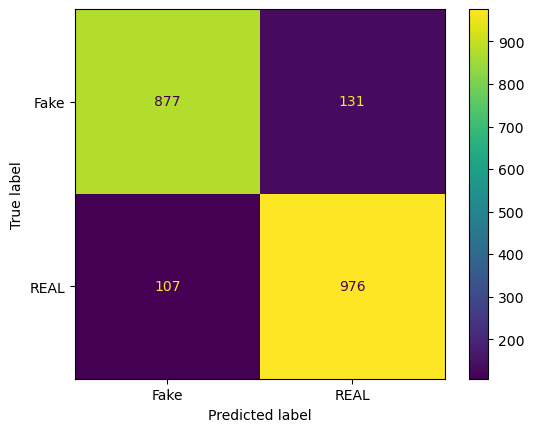

In [9]:
# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'REAL'])
cm_display.plot()

## TfidfVectorizer

This model may not work as well with floats, such as tfidf weighted inputs. nstead, use support vector machines or even linear models. But you should try it to see if works or not

In [10]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
# Create TF-IDF vectorizer with max_df=0.7 (removes words that appear in more than 70% of documents)
tfidf_vectorizer = TfidfVectorizer(stop_words = "english", max_features= 30000, max_df = 0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test
tfidf_test = tfidf_vectorizer.transform(X_test)

In [11]:
# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns = tfidf_vectorizer.get_feature_names_out())

tfidf_df

,aa,aaa,aab,aam,aap,aaron,aaronson,ab,aba,abaaoud,...,zoo,zorats,zubeidat,zucker,zuckerberg,zuesse,zukowskiserlin,zulu,zulus,zwick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Naive Bayes

In [12]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB(alpha = 0.1)

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

### Evaluation

In [13]:
# Calculate the accuracy score: score
score = accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, pred)

0.8986131037780966


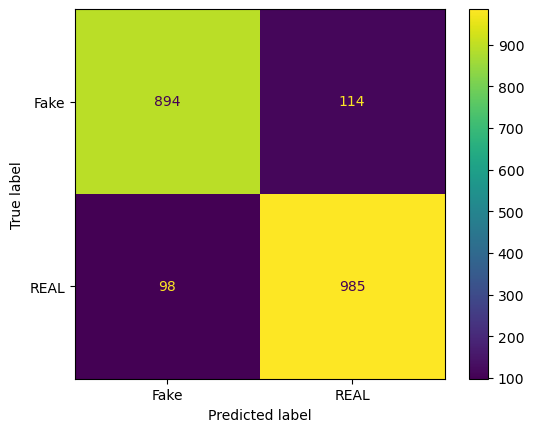

In [14]:
# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'REAL'])
cm_display.plot()